# Module 9: Accessing Remote Resources
March 12, 2021

In the last lecture before the midterm we had a look at file input/output and error handling in Python. Working with files allows us to do things with more comprehensive (and interesting) data than simple user inputs. Error handling becomes more important when program inputs are less controllable, and we saw that Python provides the try-execpt construct and exception objects as dedicated mechanisms to help making programs more robust. 

Today we will briefly discuss some basics about web resources, and then see how to fetch resources from the web, how to call REST-based web services, how to handle results or files in XML format, and how to “scrape” content from web pages.

Next time we will dive deeper into using Python for data science, covering reference processes and common data science libraries from the Python ecosystem.

## Preliminaries: WWW, URLs and HTTP(S)

The world wide web (WWW, or often simply "the web") is a network of resources that are interconnected and reachable via the internet through Uniform Resource Locators (URLs). Web resources can be simple documents like web pages, computational services (Web Services), or also interfaces of devices (in the “Internet of Things”).

Here are some examples of URLs that you might have come across already:

* https://www.uu.nl/  
* http://www.cs.uu.nl/education/vak.php?stijl=1&vak=INFOMCTH&jaar=2019
* https://www.uu.nl/organisatie/huisstijl/voor-docent-en-student#powerpoint

Do you recognize a common structure? All URLs have the following generic form:

**scheme:[//**[user[:password]@]**host**[:port]]**[/path]**[?query][#fragment]
    
Every URL includes the scheme (e.g. http(s), ftp, file) followed by a double colon ":" and for most schemes also the double slash ("//"), the host name or IP address, and the path of the resource on the host (a single “/” means that the resource is directly at the root). Additionally, URLs can also contain a user name, password, port, query (starting with a "?") or fragment (starting with a "#") can be included.

Most of the URLs that we will be dealing with in this course start with http or https, indicating that they respond to requests made via the Hypertext Transfer Protocol (HTTP). HTTPS is an encrypted (secure) version of HTTP. You will have seen URLs starting with http or https many times in your browser. The browser serves a client that sends requests to a web server. The server responds to the request by sending back the website (in HTML) that corresponds to the URL in the request. Also other programs can act as HTTP clients and send request to servers, and the response can also be something different than a website (for example plain text, files, images, …).

HTTP defines a number of request methods, of which only two are relevant for us in the following: GET and POST. As the name suggests, GET simply retrieves what the URL is pointing at. Importantly, it should only read the resource in question, and nothing else, so that no side effects can occur by answering the request. Most requests to websites are simply GET requests. In contrast, the POST method allows the client to send data along with the request, and potentially change something on the server side. For example, add a new entry to a database or a discussion forum, or start a computation with the data.

404 ("Resource not found") is probably the best-known HTTP status code, but there are several more, all consisting of 3 digits. A complete list is available at https://www.w3.org/Protocols/rfc2616/rfc2616-sec10.html. Generally, status codes starting with 1 are just informational, codes starting with 2 indicate successful requests, codes starting with 3 inform about redirections, codes starting with 4 point to client errors, and those starting with 5 are returned in case of server errors.

## Fetching a Resource from the Web

There are different possibilities to access web resources from within Python programs. One of the easiest ways is to use the ```requests``` library (https://pypi.org/project/requests/, see also https://requests.readthedocs.io/en/master/user/quickstart/ for an introduction with several useful examples). It is not part of the standard library and thus might need to be installed first, e.g. by executing the command ```"pip install requests"``` on the command line.

The following code shows how the UniProt database entry that we used in one of the earlier lectures (available online at https://www.uniprot.org/uniprot/P05787.txt) can be downloaded automatically:

In [ ]:
import requests

# try to GET entry P05787 from UniProt
try: 
    response = requests.get("https://www.uniprot.org/uniprot/P05787.txt")
except Exception as err:
    print("Something went wrong:", err)
    response = None
    
# if the GET was successful, print status code and content (if available)
if response!=None:
    print(response.status_code)
    if response.ok:
        print(response.text)
    else:
        print("Something went wrong with status code", response.status_code)    

That is, the call to the ```requests.get()``` method with the URL returns a response object if successful. If the status code in the response is ok (typically that means code 200 or a similarly "okay" outcome of the call), it will print the textual content of the response, otherwise it will print information about the status code. The website https://requests.readthedocs.io/en/master/user/quickstart/#response-content describes the content of response objects in more detail.

This example also shows how try-and-except error handling can be done when working with remote resources, but for better readability we will omit that for the next examples to come.

## REST Web Services

REST stands for REpresentational State Transfer and is a HTTP-based way of operating web services. As a result, these RESTful or REST-compliant web services are much easier to use than the once more popular WSDL and SOAP web services (not discussed in this course) and are today significantly more widespread.

For example, the website http://itsthisforthat.com/ also provides a REST web service interface (http://itsthisforthat.com/api.php) for accessing their phrase generator.  The following code suffices to call it:

In [3]:
import requests

print("Wait, what does your startup do?")

response = requests.get("http://itsthisforthat.com/api.php", params="text")
print(response.text)

Wait, what does your startup do?
So, Basically, It's Like A Slack for Qualifying Leads.


It is essentially the same code as for fetching the web resource in the previous example, only that we also add the ```text``` parameter to the request, resulting in the URL http://itsthisforthat.com/api.php?text, which calls the function behind the URL with a parameter that specifies that the response should be in text format.

Another parameter that is accepted by the web service is ```json``` instead of ```text```. JSON stands for JavaScript Object Notation and has become a popular data exchange format also for web services in the last years. It serializes data objects in structures of key-value pairs and array data types, and can thus easily be converted into dictionaries and lists in Python. The ```json``` library (https://docs.python.org/3/library/
json.html) provides functions for this purpose. In code:


In [4]:
import json
import requests

response = requests.get("http://itsthisforthat.com/api.php", params="json")
print(response.text)

response_json = json.loads(response.text)
print("So, basically, it's like a " + response_json["this"] + " for " + response_json["that"] + ".")

{"this":"Google Analytics","that":"Airlines"}
So, basically, it's like a Google Analytics for Airlines.


For an example with POST, we use the QR code web service at http://goqr.me/api/doc/create-qr-code/. It can be called from Python as follows:

In [5]:
import requests
import urllib.parse

# base URL of the QR-Code API
base_url = "https://api.qrserver.com/v1/create-qr-code/"

# text to encode (must be URL-encoded)
text = "How much wood would a woodchuck chuck..."
urllib.parse.quote_plus(text)

 # POST text and other parameters to the web service
payload = {'data': text, 'color': '0000ff'}
response = requests.post(base_url, data=payload)

# write the response into a binary file
with open("img/qrcode.png", "wb") as file:
    file.write(bytearray(response.content))

The input text need to be encoded in URL format, that is why we call ```urllib.parse.quote_plus``` before proceeding. The data to be passed with the POST request is defined as a dictionary, where the keys correspond to the parameter names as described on the service's website, and the values are the values that we want to pass. The result of this request is not text, but a PNG image, which is why we save the content of the response object directly into (binary) file that can then be opened by a normal image viewer:

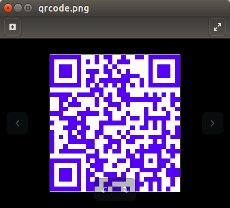
 
Note that the individual web services can vary considerably regarding the details of calling them. Hence it is important to read the providers' documentation carefully and follow the given instructions.

## XML Parsing

We have already seen how to deal with plain-text and JSON-formatted responses from API functions and Web Services. You might have seen already that in practice also XML-formatted responses occur regularly. XML stands for "eXtensible markup language" and is used for semistructured data, surrounding data elements by tags that describe what they are. XML documents are element trees, that is, they have a designated root element from which diverging (child) branches ultimately lead to the leaf elements. See the file ```simple.xml``` for an example and if you like https://www.w3schools.com/xml/xml_tree.asp for a more detailed explanation.

In some cases, the relevant information from XML files can be extracted with regular expressions (capturing the content between specific tags), but in general this is not the preferred way to deal with XML content. Rather, specialized libraries should be used that adequately deal with the tree structure of the XML. A very easy-to-use library for working with XML files is ```xmltodict``` (https://github.com/martinblech/xmltodict). Basically, it converts the XML tree into a nested structure of dictionaries and lists, which makes it relatively easy to navigate through the element tree.

For example, the following code prints the list of available dishes from ```simple.xml```:

In [7]:
import xmltodict

with open("data/simple.xml", "r") as file:
    content_xml = file.read()
    
content_dict = xmltodict.parse(content_xml)

for dish in content_dict["breakfast_menu"]["food"]:
    print(dish["name"])

Belgian Waffles
Strawberry Belgian Waffles
Berry-Berry Belgian Waffles
French Toast
Homestyle Breakfast


Basically, a dictionary key is created for each tag in the XML document, with the root element being the first, and the other elements following in the order of the tree down to the leaves. The value can either be another dictionary for the next level (in the above example, this is the case for the key "breakfast_menu", that is ```content_dict["breakfast_menu"]``` is another dictionary), a list of dictionaries for the next level in case there is more than one instance of the same element (e.g. ```content_dict["breakfast_menu"]["food"]```), or the plain value at the leaf (e.g. ```dish["name"]```).

As another, more realistic example for this course, consider the file ```esearch.xml```, which contains the result of a literature database search with the NCBI’s Entrez web service. The following code prints the list of IDs of the papers found:


In [8]:
with open("data/esearch.xml", "r") as file:
    content_xml = file.read()
    
content_dict = xmltodict.parse(content_xml)

print(content_dict["eSearchResult"]["IdList"]["Id"])

['19008416', '18927361', '18787170', '18487186', '18239126', '18239125']


## Web Scraping with Beautiful Soup

HTML (have a look at http://www.columbia.edu/~fdc/sample.html and its source for a quick introduction if it is new to you), the language that describes websites to browsers, is in many ways very similar to XML (with the concept of tags to mark up content etc.). However, usually a really well-formed structure like in XML is not enforced for HTML documents. Thus, XML parsers often run into problems when they have to deal with “messy” HTML content. Beautiful Soup (https://www.crummy.com/software/BeautifulSoup/) is a Python package that has been designed for processing HTML content, in particular with so-called web scraping applications in mind, that is, programs that extract information from websites that have actually been built for human users.

When applied to a HTML document, Beautiful Soup will turn it into a complex tree of Python objects. Only a few lines of code are needed for that:

In [9]:
import bs4
import requests

# GET document from https://nos.nl/
response = requests.get("https://nos.nl/")

# get HMTL content from response object
html_doc = response.text

# turn into BS4 object
soup = bs4.BeautifulSoup(html_doc, 'html.parser')

We could print it out now, but that’s not really more meaningful than looking at the website’s source code in the browser…

We have a ```BeautifulSoup``` object now, which represents the HTML document as a whole. We can retrieve information from it by stating the tag we are interested in, for example “title” or (the first) “img”:

In [10]:
print(soup.title)
print(soup.img)

<title>
        NOS.nl - Nieuws, Sport en Evenementen | Nederlandse Omroep Stichting
    </title>
<img alt="" class="weather-icon__image js-weather-icon" data-src-base="/bundles/nossite/img/icons/weather/72x72" src="https://assets.nos.nl/bundles/nossite/img/icons/weather/72x72/bd____.png?2102191042"/>


So, obviously we get back the corresponding tags. Tag is another important data type in Beautiful Soup. Tags can contain strings, which are accessible through appending ```.string``` to a tag object. For example in our title:

In [11]:
print(soup.title.string)


        NOS.nl - Nieuws, Sport en Evenementen | Nederlandse Omroep Stichting
    


Or, directly with stripping away the surrounding whitespaces:

In [12]:
print(soup.title.string.strip())

NOS.nl - Nieuws, Sport en Evenementen | Nederlandse Omroep Stichting


Technically, the strings obtained from tags in this way are ```NavigableStrings```, which can basically be navigated like the big document tree in the ```BeautifulSoup``` object. Tags also have a name (accessible through appending ```.name```) and attributes, which can be accessed like elements in a dictionary:

In [13]:
print(soup.img["alt"])
print(soup.img["src"])


https://assets.nos.nl/bundles/nossite/img/icons/weather/72x72/bd____.png?2102191042


In practice it is often useful to search for all images, all links, all… in a HTML document. This is what the ```find_all method``` is there for. For example all images:

In [14]:
print(soup.find_all("img"))

[<img alt="" class="weather-icon__image js-weather-icon" data-src-base="/bundles/nossite/img/icons/weather/72x72" src="https://assets.nos.nl/bundles/nossite/img/icons/weather/72x72/bd____.png?2102191042"/>, <img alt="" class="image_32geJsRK" src="https://cdn.nos.nl/image/2021/03/05/720851/384x216a.jpg"/>, <img alt="" class="image_32geJsRK" src="https://cdn.nos.nl/image/2021/03/05/720830/384x216a.jpg"/>, <img alt="" class="image_32geJsRK" src="https://cdn.nos.nl/image/2021/03/05/720818/384x216a.jpg"/>, <img alt="" class="image_32geJsRK" src="https://cdn.nos.nl/image/2021/03/05/720855/384x216a.jpg"/>, <img alt="" class="image_32geJsRK" src="https://cdn.nos.nl/image/2021/03/05/720839/384x216a.jpg"/>, <img alt="" class="image_32geJsRK" src="https://cdn.nos.nl/image/2021/03/05/720829/384x216a.jpg"/>, <img alt="" class="image_32geJsRK" src="https://cdn.nos.nl/image/2021/03/04/720800/384x216a.jpg"/>, <img alt="" class="image_32geJsRK" src="https://cdn.nos.nl/image/2021/03/05/720822/384x216a.j

A more useful example for scraping content from a news site is to get a list of the current top stories and featured articles. Looking at the source code of https://nos.nl/, we can see that for example a tag ```<h2 class="title_2P9RJtrp"> … </h2>```is used around the two top stories and a tag ```<span class="list-featured__title link-hover"> … </span>``` around the featured headlines that are presented at the landing page. They can be extracted and displayed with the following code:

In [16]:
print("-------------------")
print("CURRENT TOP STORIES")
print("-------------------")

topstories = soup.find_all("h2", "title_2P9RJtrp")
counter = 1

for ts in topstories:
    print(f"{counter}. {ts.contents[0].strip()}")
    counter += 1
    
print("-------------------------")
print("CURRENT FEATURED ARTICLES")
print("-------------------------")

headlines = soup.find_all("span", "list-featured__title link-hover")
counter = 1
for ch in headlines:
    print(f"{counter}. {ch.contents[0]}")
    counter += 1
    
print("-----------------")

-------------------
CURRENT TOP STORIES
-------------------
1. 'Toeslagenaffaire gaat verder terug dan tot nu toe bekend was'
2. Doodgeschoten 19-jarige Angel is 'held van Myanmar'
-------------------------
CURRENT FEATURED ARTICLES
-------------------------
1. Podcast De Dag: Omstreden Mr. Big levert de politie weinig op
2. Nieuwe wielerregels: als kamikaze dalen en bidonnen gooien mag niet meer
3. Divers, afgeschermd en veel royalty: dit is de nieuwe school van prinses Alexia 
-----------------


So much for a short demo of web scraping with Beautiful Soup. If you are interested in learning more about web scraping or even use it in your project, you will find more details at https://www.crummy.com/software/BeautifulSoup/bs4/doc/. Note that web scraping is always a bit “hacky”, as for example the structure of the source file might change any time and break the program (I change the code for the NOS example every year), so it should only be used when there is really no better way to get the data.

## Exercises

Please use Quarterfall to submit and check your answers. 

### 1. Reading Content from the Web (★★★★☆)

UniProt (the Universal Protein resource, https://www.uniprot.org/) is a popular bioinformatics database. As its name suggests, it contains protein sequences and information about them. Each entry in UniProt has a unique identifier, also known as “accession number”. UniProt accession numbers have a particular format, described in detail at https://www.uniprot.org/help/accession_numbers. UniProt entries can be downloaded in plain text format via the URL https://www.uniprot.org/uniprot/<accession number>.txt, e.g. https://www.uniprot.org/uniprot/P05787.txt.
Write a Python program that asks the user to enter a UniProt Accession number, checks if it is valid, and if so downloads the corresponding entry and saves it into the local directory in a file with the name of the accession number. To check if the ID is valid, you can use the function below:

```
import re
# function for checking if an ID has valid UniProt format
def is_uniprot_accession(acc):
    uniprot_pattern = "[OPQ][0-9][A-Z0-9]{3}[0-9]|[A-NR-Z][0-9]([A-Z][A-Z0-9]{2}[0-9]){1,2}"
    return bool(re.fullmatch(uniprot_pattern, acc))
```
The output of the program should be something like:
```
Please enter a Uniprot accession number: asd
Invalid input, try again.
Please enter a Uniprot accession number: P05787
File saved as P05787.txt
```

### 2. Calling REST Web Services with GET (★★★★☆)

Write a small Python program that calls the "Advice Slip" web service described at http://api.adviceslip.com/#endpoint-search with a search term that is entered by the user. If suitable advice is found, they should be printed to the user in some easily readable format. If not, the program should simply inform the user that "No suitable advice was found.". Note that for this web service, the search term is not passed as a query parameter to the URL, but appended to the path.

The output should be something like:

```
What would you like advice on? Cake
No suitable advice found.
What would you like advice on? Cars
Advice No. 4 : Cars are bad investments.
```

### 3. Calling REST Web Services with POST (★★★★☆)
Extend the QR-Code example from the lecture so that it asks the color, background color and file format to be used from the user, and then calls the service and saves the result accordingly.
The output should be something like:
```
Please enter the text you want to encode: Hello world!
Please enter the color you want to use (in RGB): 5f8232
Please enter the background color you want to use (in RGB): 204021
Please enter the image format you want to use (png, jpg, ...): png
```